# Análisis Exploratorio de Datos

## 1. Carga de Librerías y Datos

In [1]:
library(dplyr)
library(ggplot2)
library(corrplot)
library(VIM)
library(DataExplorer)
library(gridExtra)
library(scales)
library(lubridate)
library(knitr)
library(DT)
library(tidyr)

if(!dir.exists("../images")) {
  dir.create("../images")
}

save_plot <- function(plot, filename, width = 10, height = 6) {
  ggsave(paste0("../images/", filename), plot = plot, 
         width = width, height = height, dpi = 300, units = "in")
}


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


corrplot 0.92 loaded

Loading required package: colorspace

Loading required package: grid

VIM is ready to use.


Suggestions and bug-reports can be submitted at: https://github.com/statistikat/VIM/issues


Attaching package: ‘VIM’


The following object is masked from ‘package:datasets’:

    sleep



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
data <- read.csv("../data/input/Muestra_Siniestros_4.csv", stringsAsFactors = FALSE)

## 2. Exploración Inicial de la Estructura

In [3]:
str(data)

'data.frame':	5000 obs. of  18 variables:
 $ Amparo         : chr  NA NA NA NA ...
 $ Amp            : chr  NA NA NA NA ...
 $ SumaDePagos    : num  NA NA NA NA NA NA NA NA NA NA ...
 $ Modelo         : int  2013 2010 2012 2008 2008 2007 2012 2007 2010 2011 ...
 $ Color          : chr  "ROJO" "PLATA" "PLATA" "BLANCO" ...
 $ Carroceria     : chr  "SEDAN" "HATCHBACK" "SEDAN" "SEDAN" ...
 $ MARCA          : chr  "HYUNDAI" "HYUNDAI" "HYUNDAI" "HYUNDAI" ...
 $ Referencia1    : chr  "VELOSTER" "ATOS [2]" "ACCENT i25" "ATOS [2]" ...
 $ Referencia2    : chr  "COUPE" "PRIME" "1.4L" "PRIME" ...
 $ CLASE_FASECOLDA: chr  "AUTOMOVIL" "AUTOMOVIL" "AUTOMOVIL" "AUTOMOVIL TAXI" ...
 $ TIPO_VEHICULO  : chr  "Livianos" "Livianos" "Livianos" "Livianos" ...
 $ SERVICIO       : chr  "Particular" "Particular" "Particular" "Particular" ...
 $ Sexo_Aseg      : chr  "F" "M" "F" "M" ...
 $ Edad           : int  34 67 32 0 53 35 65 0 44 0 ...
 $ Desde          : chr  "2011-09-29" "2011-10-01" "2012-02-14" "2012-0

In [4]:
head(data, 10)

,Amparo,Amp,SumaDePagos,Modelo,Color,Carroceria,MARCA,Referencia1,Referencia2,CLASE_FASECOLDA,TIPO_VEHICULO,SERVICIO,Sexo_Aseg,Edad,Desde,Hasta,Vr_Comercial,Pago
,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<chr>
1,NA,NA,NA,2013,ROJO,SEDAN,HYUNDAI,VELOSTER,COUPE,AUTOMOVIL,Livianos,Particular,F,34,2011-09-29,2012-11-14,56490000,No
2,NA,NA,NA,2010,PLATA,HATCHBACK,HYUNDAI,ATOS [2],PRIME,AUTOMOVIL,Livianos,Particular,M,67,2011-10-01,2012-10-01,16400000,No
3,NA,NA,NA,2012,PLATA,SEDAN,HYUNDAI,ACCENT i25,1.4L,AUTOMOVIL,Livianos,Particular,F,32,2012-02-14,2013-02-14,34700000,No
4,NA,NA,NA,2008,BLANCO,SEDAN,HYUNDAI,ATOS [2],PRIME,AUTOMOVIL TAXI,Livianos,Particular,M,0,2012-05-30,2013-05-30,12300000,No
5,NA,NA,NA,2008,VINO TINTO,SEDAN,HYUNDAI,ACCENT VISION,GLS,AUTOMOVIL,Livianos,Particular,F,53,2011-06-06,2012-06-06,23400000,No
6,NA,NA,NA,2007,PLATA,HATCHBACK,HYUNDAI,ATOS [2],SANTRO,AUTOMOVIL,Livianos,Particular,F,35,2012-06-23,2013-06-23,16000000,No
7,NA,NA,NA,2012,ROJO,HATCHBACK,HYUNDAI,i10,GL,AUTOMOVIL,Livianos,Particular,F,65,2011-09-05,2012-09-05,24900000,No
8,NA,NA,NA,2007,BLANCO,FURGON,HYUNDAI,HD,65,FURGON,Pesados,Publico,NA,0,2012-07-03,2013-07-03,39800000,No
9,NA,NA,NA,2010,BLANCO,HATCHBACK,HYUNDAI,i10,GL,AUTOMOVIL,Livianos,Particular,F,44,2012-07-01,2013-07-01,21250000,No


In [5]:
summary(data)

    Amparo              Amp             SumaDePagos           Modelo    
 Length:5000        Length:5000        Min.   :       0   Min.   :1993  
 Class :character   Class :character   1st Qu.:   77500   1st Qu.:2008  
 Mode  :character   Mode  :character   Median : 1739484   Median :2010  
                                       Mean   : 3622724   Mean   :2009  
                                       3rd Qu.: 4000000   3rd Qu.:2012  
                                       Max.   :38868000   Max.   :2013  
                                       NA's   :4320                     
    Color            Carroceria           MARCA           Referencia1       
 Length:5000        Length:5000        Length:5000        Length:5000       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                               

## Estructura del Dataset

In [6]:
columnas <- names(data)
for(i in 1:length(columnas)) {
  cat(paste(i, ".", columnas[i], "\n"))
}

1 . Amparo 
2 . Amp 
3 . SumaDePagos 
4 . Modelo 
5 . Color 
6 . Carroceria 
7 . MARCA 
8 . Referencia1 
9 . Referencia2 
10 . CLASE_FASECOLDA 
11 . TIPO_VEHICULO 
12 . SERVICIO 
13 . Sexo_Aseg 
14 . Edad 
15 . Desde 
16 . Hasta 
17 . Vr_Comercial 
18 . Pago 


In [7]:
data_clean <- data %>%
  mutate(
    Modelo = as.numeric(Modelo),
    Edad = as.numeric(Edad),
    Vr_Comercial = as.numeric(Vr_Comercial),
    Desde = as.Date(Desde),
    Hasta = as.Date(Hasta)
  )

variables_numericas <- c("Modelo", "Edad", "Vr_Comercial")
variables_categoricas <- c("Amp", "Color", "Carroceria", "MARCA", "Referencia1", 
                          "Referencia2", "CLASE_FASECOLDA", "TIPO_VEHICULO", 
                          "SERVICIO", "Sexo_Aseg", "Pago")
variables_fechas <- c("Desde", "Hasta")

## Valores Faltantes

In [8]:
missing_summary <- data_clean %>%
  summarise_all(~sum(is.na(.))) %>%
  gather(variable, missing_count) %>%
  mutate(missing_pct = round(missing_count / nrow(data_clean) * 100, 2)) %>%
  arrange(desc(missing_count))

kable(missing_summary, 
      col.names = c("Variable", "Valores Faltantes", "Porcentaje (%)"),
      caption = "Análisis de Valores Faltantes")



Table: Análisis de Valores Faltantes

|Variable        | Valores Faltantes| Porcentaje (%)|
|:---------------|-----------------:|--------------:|
|Amparo          |              4320|           86.4|
|Amp             |              4320|           86.4|
|SumaDePagos     |              4320|           86.4|
|Sexo_Aseg       |               625|           12.5|
|Modelo          |                 0|            0.0|
|Color           |                 0|            0.0|
|Carroceria      |                 0|            0.0|
|MARCA           |                 0|            0.0|
|Referencia1     |                 0|            0.0|
|Referencia2     |                 0|            0.0|
|CLASE_FASECOLDA |                 0|            0.0|
|TIPO_VEHICULO   |                 0|            0.0|
|SERVICIO        |                 0|            0.0|
|Edad            |                 0|            0.0|
|Desde           |                 0|            0.0|
|Hasta           |                 0|     


 Variables sorted by number of missings: 
        Variable Count
          Amparo 0.864
             Amp 0.864
     SumaDePagos 0.864
       Sexo_Aseg 0.125
          Modelo 0.000
           Color 0.000
      Carroceria 0.000
           MARCA 0.000
     Referencia1 0.000
     Referencia2 0.000
 CLASE_FASECOLDA 0.000
   TIPO_VEHICULO 0.000
        SERVICIO 0.000
            Edad 0.000
           Desde 0.000
           Hasta 0.000
    Vr_Comercial 0.000
            Pago 0.000


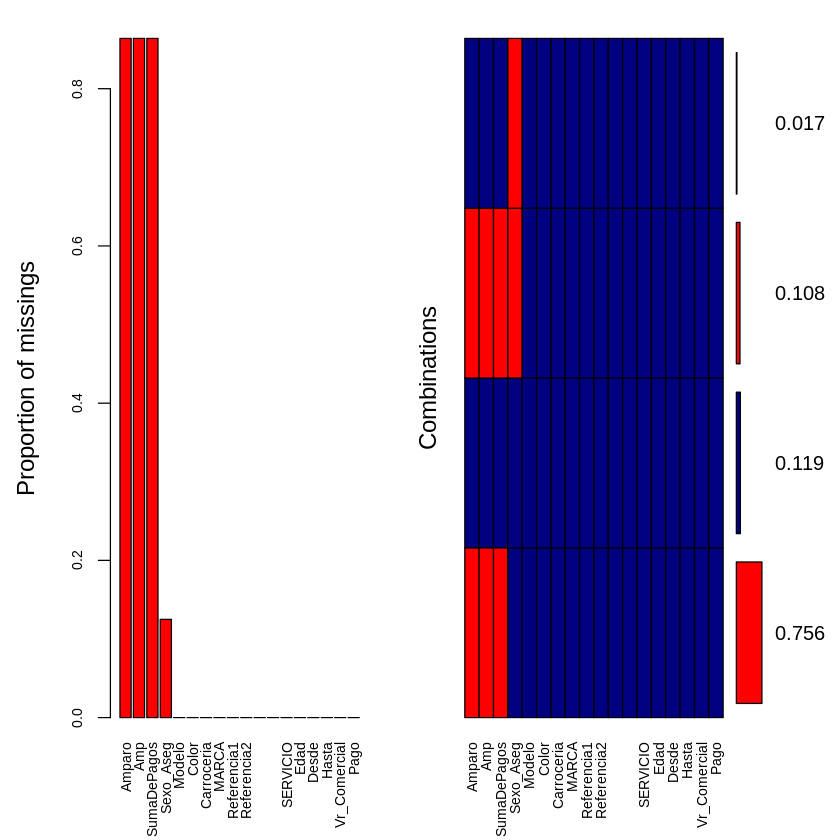

In [9]:
VIM::aggr(data_clean, col = c('navyblue','red'), 
          numbers = TRUE, sortVars = TRUE, 
          labels = names(data_clean), cex.axis = 0.7)

## Variables Categóricas

In [10]:
for(var in variables_categoricas) {
  if(var %in% names(data_clean)) {
    freq_table <- table(data_clean[[var]], useNA = "ifany")
    freq_df <- data.frame(
      Categoria = names(freq_table),
      Frecuencia = as.numeric(freq_table),
      Porcentaje = round(as.numeric(freq_table) / nrow(data_clean) * 100, 2)
    )
    freq_df <- freq_df[order(-freq_df$Frecuencia), ]
    cat("Variable:", var, "\n")
    print(kable(freq_df))
    cat("\n")
  }
}

Variable: Amp 


|   |Categoria | Frecuencia| Porcentaje|
|:--|:---------|----------:|----------:|
|8  |NA        |       4320|      86.40|
|3  |PPD       |        518|      10.36|
|7  |RC        |         68|       1.36|
|6  |PTH       |         32|       0.64|
|5  |PTD       |         28|       0.56|
|2  |GT        |         24|       0.48|
|4  |PPH       |          9|       0.18|
|1  |ASI       |          1|       0.02|

Variable: Color 


|   |Categoria       | Frecuencia| Porcentaje|
|:--|:---------------|----------:|----------:|
|16 |PLATA           |        902|      18.04|
|1  |AMARILLO        |        870|      17.40|
|5  |BLANCO          |        774|      15.48|
|11 |GRIS            |        735|      14.70|
|14 |NEGRO           |        435|       8.70|
|3  |AZUL            |        431|       8.62|
|19 |ROJO            |        384|       7.68|
|17 |PLATEADO        |        107|       2.14|
|22 |VERDE           |         92|       1.84|
|4  |BEIGE           |         71|  

## Variables Numéricas

In [11]:
for(var in variables_numericas) {
  if(var %in% names(data_clean)) {
    vec <- data_clean[[var]]
    vec_clean <- vec[!is.na(vec)]
    
    if(length(vec_clean) > 0) {
      stats <- data.frame(
        Estadistico = c("N válidos", "Media", "Mediana", "Desv. Estándar", 
                       "Mínimo", "Q1", "Q3", "Máximo"),
        Valor = c(
          length(vec_clean),
          round(mean(vec_clean), 2),
          round(median(vec_clean), 2),
          round(sd(vec_clean), 2),
          min(vec_clean),
          round(quantile(vec_clean, 0.25), 2),
          round(quantile(vec_clean, 0.75), 2),
          max(vec_clean)
        )
      )
      cat("Variable:", var, "\n")
      print(kable(stats))
      cat("\n")
    }
  }
}

Variable: Modelo 


|Estadistico    |   Valor|
|:--------------|-------:|
|N válidos      | 5000.00|
|Media          | 2009.15|
|Mediana        | 2010.00|
|Desv. Estándar |    3.33|
|Mínimo         | 1993.00|
|Q1             | 2008.00|
|Q3             | 2012.00|
|Máximo         | 2013.00|

Variable: Edad 


|Estadistico    |   Valor|
|:--------------|-------:|
|N válidos      | 5000.00|
|Media          |  127.14|
|Mediana        |   43.00|
|Desv. Estándar |  279.01|
|Mínimo         |    0.00|
|Q1             |   32.00|
|Q3             |   56.00|
|Máximo         |  999.00|

Variable: Vr_Comercial 


|Estadistico    |     Valor|
|:--------------|---------:|
|N válidos      |      5000|
|Media          |  26448817|
|Mediana        |  22400000|
|Desv. Estándar |  17889548|
|Mínimo         |         0|
|Q1             |  15300000|
|Q3             |  34590000|
|Máximo         | 118700000|



## Variable Objetivo

In [12]:
pago_freq <- table(data_clean$Pago, useNA = "ifany")
pago_summary <- data.frame(
  Pago = names(pago_freq),
  Frecuencia = as.numeric(pago_freq),
  Porcentaje = round(as.numeric(pago_freq) / nrow(data_clean) * 100, 2)
)

kable(pago_summary, caption = "Distribución de la Variable Objetivo: Pago")

frecuencia_siniestros <- sum(data_clean$Pago == unique(data_clean$Pago)[2], na.rm = TRUE)
total_polizas <- nrow(data_clean)
tasa_siniestralidad <- frecuencia_siniestros / total_polizas

cat("Tasa de siniestralidad:", round(tasa_siniestralidad * 100, 4), "%\n")



Table: Distribución de la Variable Objetivo: Pago

|Pago | Frecuencia| Porcentaje|
|:----|----------:|----------:|
|No   |       4485|       89.7|
|S�   |        515|       10.3|

Tasa de siniestralidad: 10.3 %


## Visualizaciones

### Distribución de Variables Numéricas

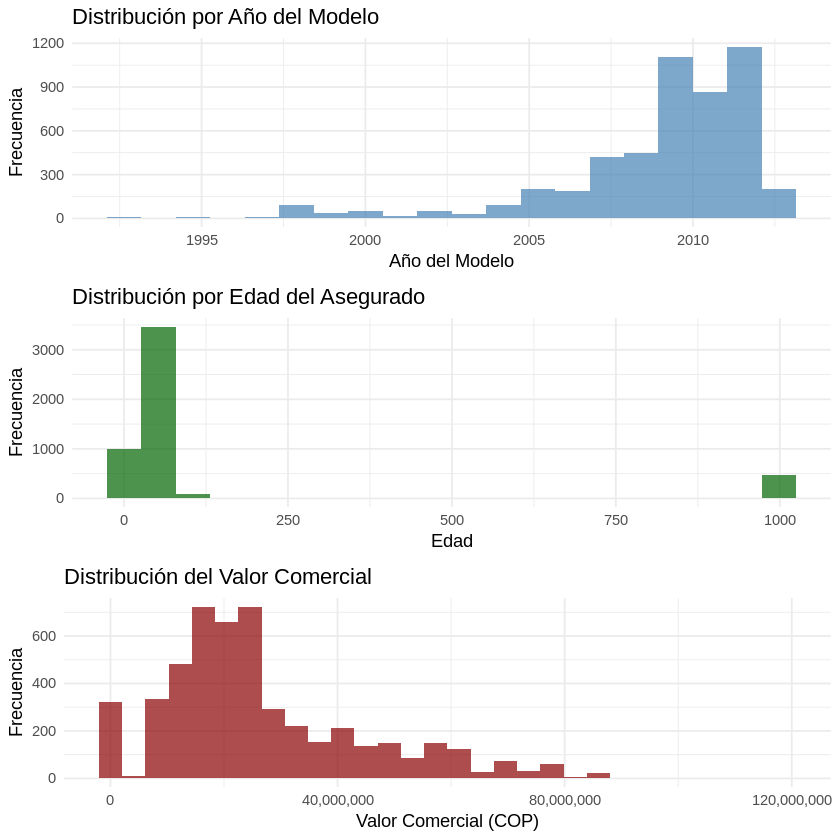

In [13]:
plot_modelo <- ggplot(data_clean, aes(x = Modelo)) +
  geom_histogram(bins = 20, fill = "steelblue", alpha = 0.7) +
  labs(title = "Distribución por Año del Modelo", x = "Año del Modelo", y = "Frecuencia") +
  theme_minimal()

plot_edad <- ggplot(data_clean, aes(x = Edad)) +
  geom_histogram(bins = 20, fill = "darkgreen", alpha = 0.7) +
  labs(title = "Distribución por Edad del Asegurado", x = "Edad", y = "Frecuencia") +
  theme_minimal()

plot_valor <- ggplot(data_clean, aes(x = Vr_Comercial)) +
  geom_histogram(bins = 30, fill = "darkred", alpha = 0.7) +
  scale_x_continuous(labels = scales::comma) +
  labs(title = "Distribución del Valor Comercial", x = "Valor Comercial (COP)", y = "Frecuencia") +
  theme_minimal()

grid.arrange(plot_modelo, plot_edad, plot_valor, ncol = 1)

### Análisis por Sexo

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'S�' in 'mbcsToSbcs': dot substituted for <ef>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'S�' in 'mbcsToSbcs': dot substituted for <bf>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'S�' in 'mbcsToSbcs': dot substituted for <bd>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'S�' in 'mbcsToSbcs': dot substituted for <ef>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'S�' in 'mbcsToSbcs': dot substituted for <bf>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'S�' in 'mbcsToSbcs': dot substituted for <bd>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y,



|Sexo_Aseg |Pago |    n|      prop|
|:---------|:----|----:|---------:|
|F         |No   | 1892| 0.9043977|
|F         |S�   |  200| 0.0956023|
|M         |No   | 2040| 0.8935611|
|M         |S�   |  243| 0.1064389|

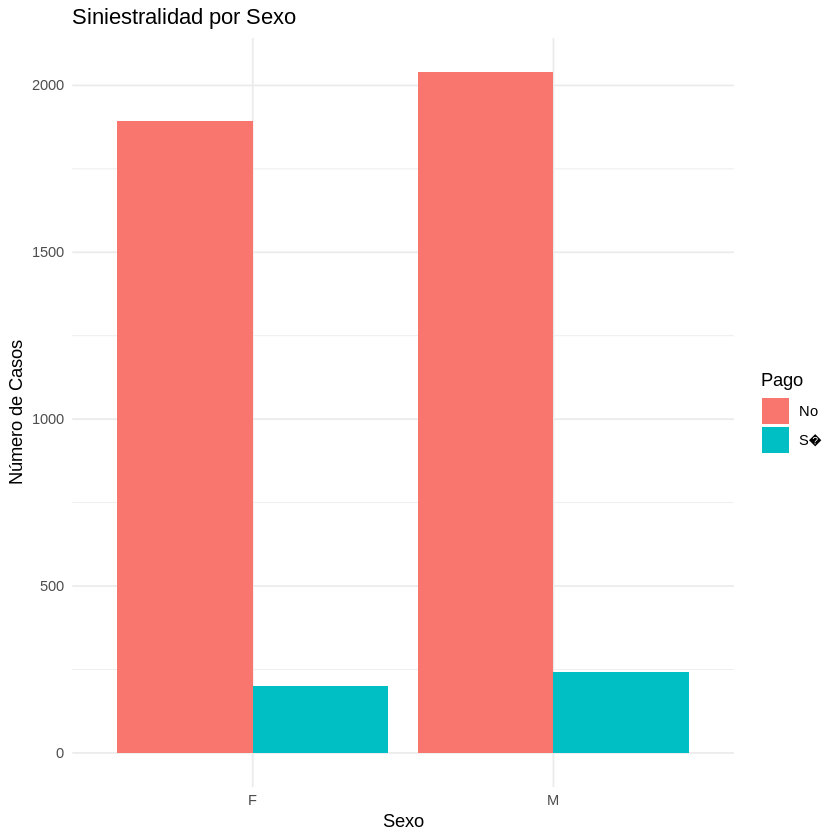

In [14]:
sexo_pago <- data_clean %>%
  filter(!is.na(Sexo_Aseg) & !is.na(Pago)) %>%
  group_by(Sexo_Aseg, Pago) %>%
  summarise(n = n(), .groups = 'drop') %>%
  group_by(Sexo_Aseg) %>%
  mutate(prop = n / sum(n))

ggplot(sexo_pago, aes(x = Sexo_Aseg, y = n, fill = Pago)) +
  geom_col(position = "dodge") +
  labs(title = "Siniestralidad por Sexo", x = "Sexo", y = "Número de Casos") +
  theme_minimal()

kable(sexo_pago)

### 8.3 Análisis por Tipo de Vehículo



|Tipo Vehículo | Total Pólizas| Siniestros| Tasa Siniestralidad (%)|
|:-------------|-------------:|----------:|-----------------------:|
|Pesados       |           143|         16|                 11.1888|
|Livianos      |          4857|        499|                 10.2738|

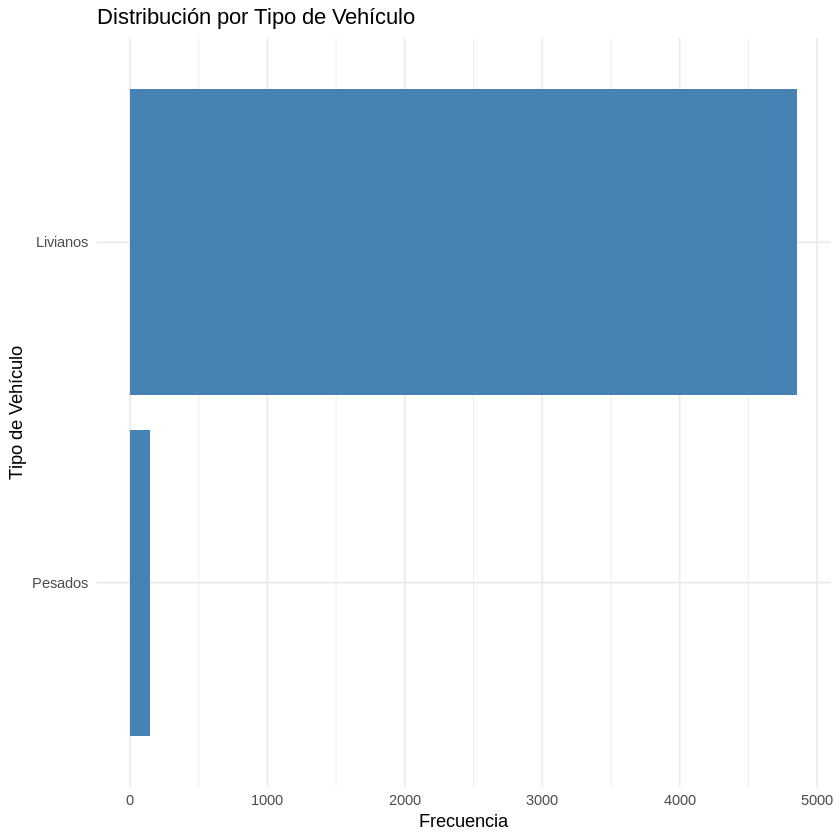

In [15]:
tipo_freq <- data_clean %>%
  filter(!is.na(TIPO_VEHICULO)) %>%
  count(TIPO_VEHICULO, sort = TRUE)

ggplot(tipo_freq, aes(x = reorder(TIPO_VEHICULO, n), y = n)) +
  geom_col(fill = "steelblue") +
  coord_flip() +
  labs(title = "Distribución por Tipo de Vehículo",
       x = "Tipo de Vehículo", y = "Frecuencia") +
  theme_minimal()

tipo_siniestros <- data_clean %>%
  filter(!is.na(TIPO_VEHICULO) & !is.na(Pago)) %>%
  group_by(TIPO_VEHICULO) %>%
  summarise(
    total = n(),
    siniestros = sum(Pago == unique(data_clean$Pago)[2], na.rm = TRUE),
    tasa_siniestralidad = round(siniestros / total * 100, 4),
    .groups = 'drop'
  ) %>%
  arrange(desc(tasa_siniestralidad))

kable(tipo_siniestros,
      col.names = c("Tipo Vehículo", "Total Pólizas", "Siniestros", "Tasa Siniestralidad (%)"))

### 8.4 Análisis por Servicio del Vehículo



|Servicio            | Total Pólizas| Siniestros| Tasa Siniestralidad (%)|
|:-------------------|-------------:|----------:|-----------------------:|
|Transporte Personal |            14|          2|                 14.2857|
|Oficial             |           264|         32|                 12.1212|
|Particular          |          3774|        394|                 10.4399|
|Publico             |           948|         87|                  9.1772|


IMPORTANCIA ACTUARIAL: La variable SERVICIO muestra diferencias significativas
en siniestralidad, siendo fundamental para la segmentación tarifaria.
Vehículos de servicio público requieren primas diferenciadas.

Gráfica exportada: analisis_servicio_vehiculo.png

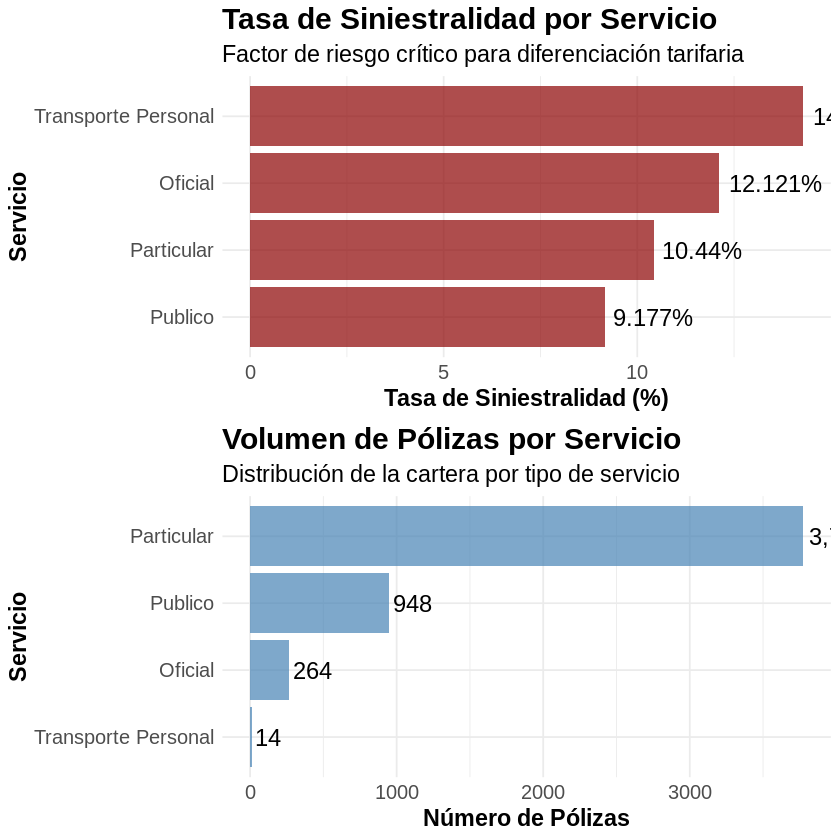

In [16]:
servicio_siniestros <- data_clean %>%
  filter(!is.na(SERVICIO) & !is.na(Pago)) %>%
  group_by(SERVICIO) %>%
  summarise(
    total = n(),
    siniestros = sum(Pago == unique(data_clean$Pago)[2], na.rm = TRUE),
    tasa_siniestralidad = round(siniestros / total * 100, 4),
    .groups = 'drop'
  ) %>%
  arrange(desc(tasa_siniestralidad))

plot_servicio_tasa <- ggplot(servicio_siniestros, aes(x = reorder(SERVICIO, tasa_siniestralidad), y = tasa_siniestralidad)) +
  geom_col(fill = "darkred", alpha = 0.7) +
  geom_text(aes(label = paste0(round(tasa_siniestralidad, 3), "%")), 
            hjust = -0.1, size = 5) +
  coord_flip() +
  labs(title = "Tasa de Siniestralidad por Servicio",
       subtitle = "Factor de riesgo crítico para diferenciación tarifaria",
       x = "Servicio", y = "Tasa de Siniestralidad (%)") +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    plot.subtitle = element_text(size = 14),
    axis.title = element_text(size = 14, face = "bold"),
    axis.text = element_text(size = 12)
  )

plot_servicio_vol <- ggplot(servicio_siniestros, aes(x = reorder(SERVICIO, total), y = total)) +
  geom_col(fill = "steelblue", alpha = 0.7) +
  geom_text(aes(label = scales::comma(total)), 
            hjust = -0.1, size = 5) +
  coord_flip() +
  labs(title = "Volumen de Pólizas por Servicio",
       subtitle = "Distribución de la cartera por tipo de servicio",
       x = "Servicio", y = "Número de Pólizas") +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    plot.subtitle = element_text(size = 14),
    axis.title = element_text(size = 14, face = "bold"),
    axis.text = element_text(size = 12)
  )

combined_servicio <- grid.arrange(plot_servicio_tasa, plot_servicio_vol, ncol = 1)

save_plot(combined_servicio, "analisis_servicio_vehiculo.png", width = 12, height = 10)

kable(servicio_siniestros,
      col.names = c("Servicio", "Total Pólizas", "Siniestros", "Tasa Siniestralidad (%)"))

cat("\nIMPORTANCIA ACTUARIAL: La variable SERVICIO muestra diferencias significativas\n")
cat("en siniestralidad, siendo fundamental para la segmentación tarifaria.\n")
cat("Vehículos de servicio público requieren primas diferenciadas.\n\n")

cat("Gráfica exportada: analisis_servicio_vehiculo.png")

### 8.5 Análisis por Marca de Vehículo

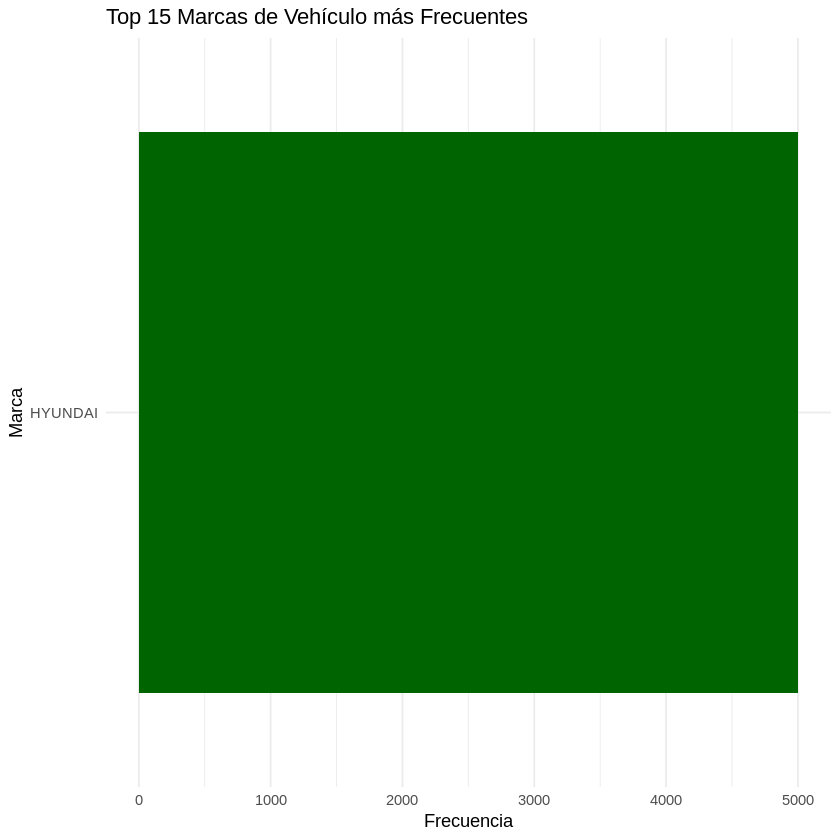

In [17]:
marca_freq <- data_clean %>%
  filter(!is.na(MARCA)) %>%
  count(MARCA, sort = TRUE) %>%
  head(15)

ggplot(marca_freq, aes(x = reorder(MARCA, n), y = n)) +
  geom_col(fill = "darkgreen") +
  coord_flip() +
  labs(title = "Top 15 Marcas de Vehículo más Frecuentes",
       x = "Marca", y = "Frecuencia") +
  theme_minimal()

### 8.6 Distribución por Color de Vehículo

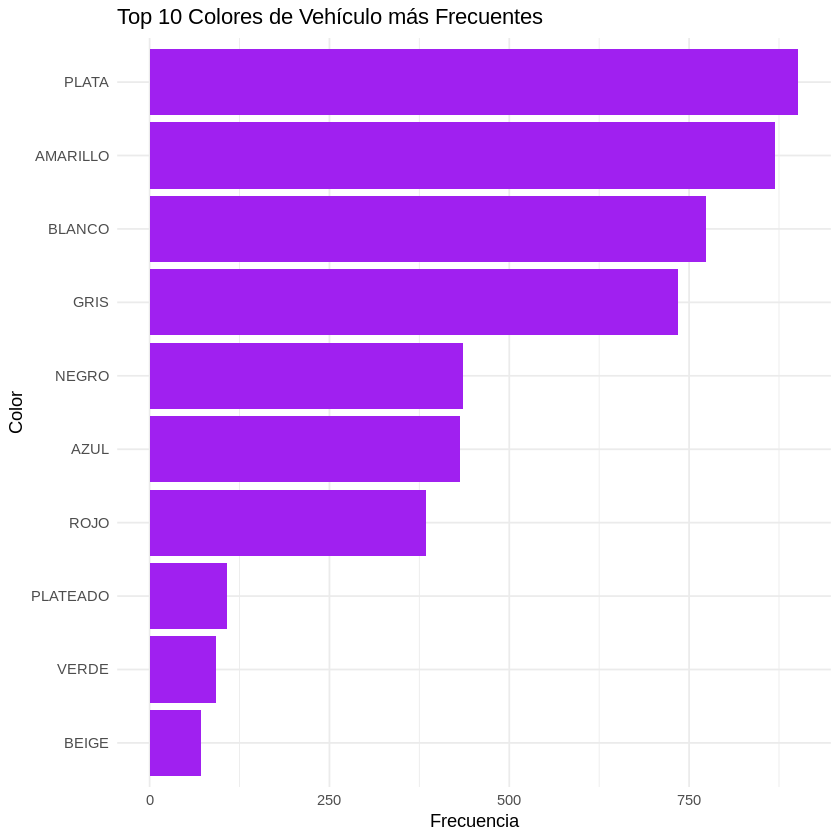

In [18]:
color_freq <- data_clean %>%
  filter(!is.na(Color)) %>%
  count(Color, sort = TRUE) %>%
  head(10)

ggplot(color_freq, aes(x = reorder(Color, n), y = n)) +
  geom_col(fill = "purple") +
  coord_flip() +
  labs(title = "Top 10 Colores de Vehículo más Frecuentes",
       x = "Color", y = "Frecuencia") +
  theme_minimal()

## 9. Análisis Actuarial Avanzado

### 9.1 Análisis de Siniestralidad por Rangos de Edad



|Rango Edad | Total Pólizas| Siniestros| Tasa (%)| Exposición (%)|
|:----------|-------------:|----------:|--------:|--------------:|
|18-25      |           152|         18|  11.8421|           3.61|
|26-35      |           650|         70|  10.7692|          15.46|
|36-45      |          1176|        116|   9.8639|          27.97|
|46-55      |           910|         87|   9.5604|          21.64|
|56-65      |           560|         59|  10.5357|          13.32|
|66+        |           757|         92|  12.1532|          18.00|


ANÁLISIS ACTUARIAL DE EDAD:
- Mayor riesgo: 6 
- Menor riesgo: 4 
- Evidencia de curva en U típica de seguros de auto: conductores jóvenes y mayores con mayor riesgo

Gráfica exportada: analisis_edad_siniestralidad.png

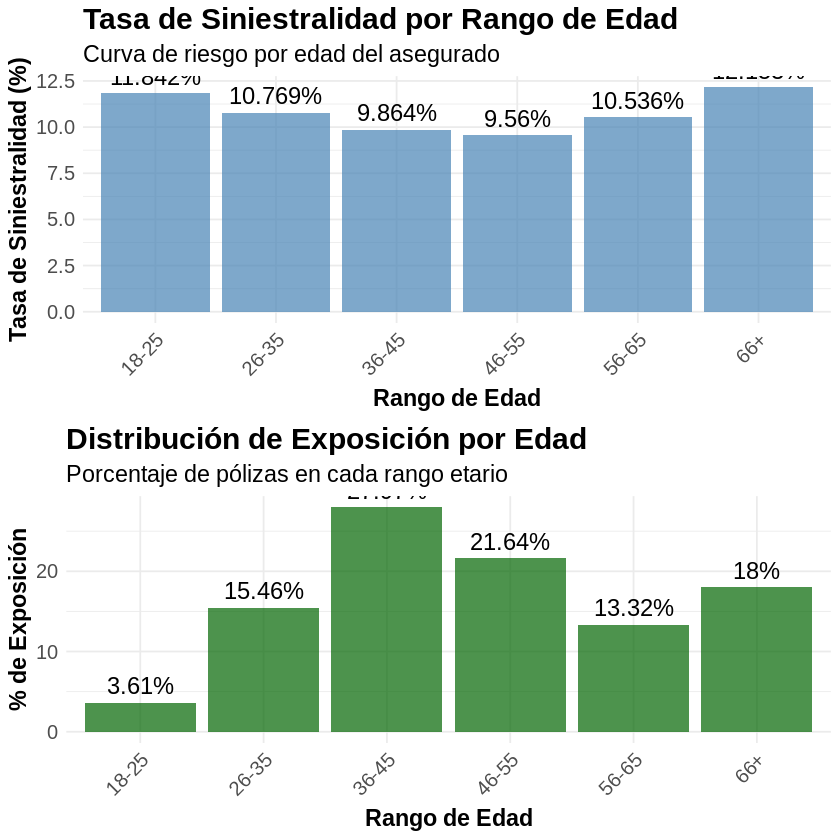

In [19]:
data_edad_analisis <- data_clean %>%
  filter(!is.na(Edad) & Edad > 0 & !is.na(Pago)) %>%
  mutate(
    rango_edad = case_when(
      Edad <= 25 ~ "18-25",
      Edad <= 35 ~ "26-35", 
      Edad <= 45 ~ "36-45",
      Edad <= 55 ~ "46-55",
      Edad <= 65 ~ "56-65",
      TRUE ~ "66+"
    ),
    rango_edad = factor(rango_edad, levels = c("18-25", "26-35", "36-45", "46-55", "56-65", "66+"))
  )

edad_siniestros <- data_edad_analisis %>%
  group_by(rango_edad) %>%
  summarise(
    total = n(),
    siniestros = sum(Pago == unique(data_clean$Pago)[2], na.rm = TRUE),
    tasa_siniestralidad = round(siniestros / total * 100, 4),
    exposicion_pct = round(total / nrow(data_edad_analisis) * 100, 2),
    .groups = 'drop'
  )

plot_edad_tasa <- ggplot(edad_siniestros, aes(x = rango_edad, y = tasa_siniestralidad)) +
  geom_col(fill = "steelblue", alpha = 0.7) +
  geom_text(aes(label = paste0(round(tasa_siniestralidad, 3), "%")), 
            vjust = -0.5, size = 5) +
  labs(title = "Tasa de Siniestralidad por Rango de Edad",
       subtitle = "Curva de riesgo por edad del asegurado",
       x = "Rango de Edad", y = "Tasa de Siniestralidad (%)") +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    plot.subtitle = element_text(size = 14),
    axis.title = element_text(size = 14, face = "bold"),
    axis.text = element_text(size = 12),
    axis.text.x = element_text(angle = 45, hjust = 1)
  )

plot_edad_exposicion <- ggplot(edad_siniestros, aes(x = rango_edad, y = exposicion_pct)) +
  geom_col(fill = "darkgreen", alpha = 0.7) +
  geom_text(aes(label = paste0(exposicion_pct, "%")), 
            vjust = -0.5, size = 5) +
  labs(title = "Distribución de Exposición por Edad",
       subtitle = "Porcentaje de pólizas en cada rango etario",
       x = "Rango de Edad", y = "% de Exposición") +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    plot.subtitle = element_text(size = 14),
    axis.title = element_text(size = 14, face = "bold"),
    axis.text = element_text(size = 12),
    axis.text.x = element_text(angle = 45, hjust = 1)
  )

combined_edad <- grid.arrange(plot_edad_tasa, plot_edad_exposicion, ncol = 1)

save_plot(combined_edad, "analisis_edad_siniestralidad.png", width = 12, height = 10)

kable(edad_siniestros,
      col.names = c("Rango Edad", "Total Pólizas", "Siniestros", "Tasa (%)", "Exposición (%)"))

cat("\nANÁLISIS ACTUARIAL DE EDAD:\n")
max_tasa_edad <- edad_siniestros$rango_edad[which.max(edad_siniestros$tasa_siniestralidad)]
min_tasa_edad <- edad_siniestros$rango_edad[which.min(edad_siniestros$tasa_siniestralidad)]
cat("- Mayor riesgo:", max_tasa_edad, "\n")
cat("- Menor riesgo:", min_tasa_edad, "\n")
cat("- Evidencia de curva en U típica de seguros de auto: conductores jóvenes y mayores con mayor riesgo\n\n")

cat("Gráfica exportada: analisis_edad_siniestralidad.png")

### 9.2 Análisis por Rangos de Valor Comercial



|Rango Valor | Total| Siniestros| Tasa (%)| Valor Promedio| Exposición (%)|
|:-----------|-----:|----------:|--------:|--------------:|--------------:|
|Hasta 20M   |  2147|        225|  10.4797|       12207317|          42.94|
|20M - 40M   |  1885|        189|  10.0265|       27169879|          37.70|
|40M - 60M   |   651|         68|  10.4455|       49936110|          13.02|
|60M - 80M   |   286|         30|  10.4895|       68593380|           5.72|
|80M - 100M  |    28|          3|  10.7143|       83483640|           0.56|
|Más de 100M |     3|          0|   0.0000|      118700000|           0.06|


ANÁLISIS ACTUARIAL DEL VALOR COMERCIAL:
- Valor promedio general: 26,448,817 COP
- Concentración en valores bajos (hasta 40M): 80.64 %
- Esto sugiere una cartera orientada a vehículos de gama media-baja

Gráfica exportada: analisis_valor_comercial.png

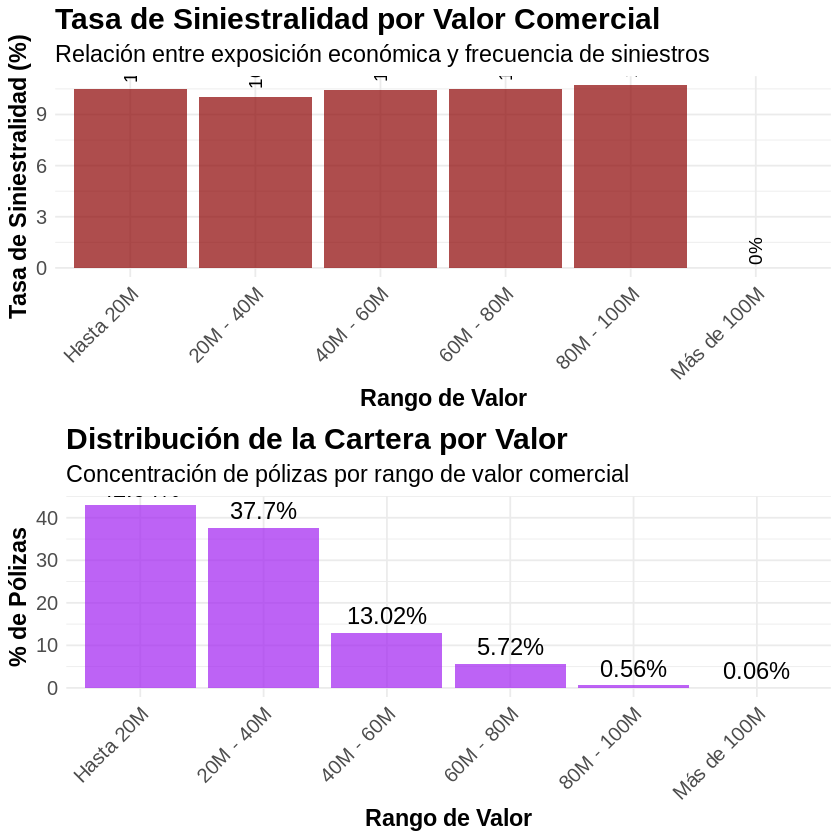

In [20]:
data_valor_analisis <- data_clean %>%
  filter(!is.na(Vr_Comercial) & !is.na(Pago)) %>%
  mutate(
    rango_valor = case_when(
      Vr_Comercial <= 20000000 ~ "Hasta 20M",
      Vr_Comercial <= 40000000 ~ "20M - 40M",
      Vr_Comercial <= 60000000 ~ "40M - 60M", 
      Vr_Comercial <= 80000000 ~ "60M - 80M",
      Vr_Comercial <= 100000000 ~ "80M - 100M",
      TRUE ~ "Más de 100M"
    ),
    rango_valor = factor(rango_valor, levels = c("Hasta 20M", "20M - 40M", "40M - 60M", 
                                               "60M - 80M", "80M - 100M", "Más de 100M"))
  )

valor_siniestros <- data_valor_analisis %>%
  group_by(rango_valor) %>%
  summarise(
    total = n(),
    siniestros = sum(Pago == unique(data_clean$Pago)[2], na.rm = TRUE),
    tasa_siniestralidad = round(siniestros / total * 100, 4),
    valor_promedio = round(mean(Vr_Comercial), 0),
    exposicion_pct = round(total / nrow(data_valor_analisis) * 100, 2),
    .groups = 'drop'
  )

plot_valor_tasa <- ggplot(valor_siniestros, aes(x = rango_valor, y = tasa_siniestralidad)) +
  geom_col(fill = "darkred", alpha = 0.7) +
  geom_text(aes(label = paste0(round(tasa_siniestralidad, 3), "%")), 
            angle = 90, vjust = 0.5, hjust = -0.1, size = 4) +
  labs(title = "Tasa de Siniestralidad por Valor Comercial",
       subtitle = "Relación entre exposición económica y frecuencia de siniestros",
       x = "Rango de Valor", y = "Tasa de Siniestralidad (%)") +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    plot.subtitle = element_text(size = 14),
    axis.title = element_text(size = 14, face = "bold"),
    axis.text = element_text(size = 12),
    axis.text.x = element_text(angle = 45, hjust = 1)
  )

plot_valor_dist <- ggplot(valor_siniestros, aes(x = rango_valor, y = exposicion_pct)) +
  geom_col(fill = "purple", alpha = 0.7) +
  geom_text(aes(label = paste0(exposicion_pct, "%")), 
            vjust = -0.5, size = 5) +
  labs(title = "Distribución de la Cartera por Valor",
       subtitle = "Concentración de pólizas por rango de valor comercial",
       x = "Rango de Valor", y = "% de Pólizas") +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    plot.subtitle = element_text(size = 14),
    axis.title = element_text(size = 14, face = "bold"),
    axis.text = element_text(size = 12),
    axis.text.x = element_text(angle = 45, hjust = 1)
  )

combined_valor <- grid.arrange(plot_valor_tasa, plot_valor_dist, ncol = 1)

save_plot(combined_valor, "analisis_valor_comercial.png", width = 12, height = 10)

kable(valor_siniestros,
      col.names = c("Rango Valor", "Total", "Siniestros", "Tasa (%)", "Valor Promedio", "Exposición (%)"))

cat("\nANÁLISIS ACTUARIAL DEL VALOR COMERCIAL:\n")
cat("- Valor promedio general:", scales::comma(round(mean(data_valor_analisis$Vr_Comercial, na.rm = TRUE))), "COP\n")
concentracion_alta <- sum(valor_siniestros$exposicion_pct[valor_siniestros$rango_valor %in% c("Hasta 20M", "20M - 40M")])
cat("- Concentración en valores bajos (hasta 40M):", concentracion_alta, "%\n")
cat("- Esto sugiere una cartera orientada a vehículos de gama media-baja\n\n")

cat("Gráfica exportada: analisis_valor_comercial.png")

### 9.3 Análisis por Antigüedad del Vehículo



|Antigüedad     | Total Pólizas| Siniestros| Tasa Siniestralidad (%)|
|:--------------|-------------:|----------:|-----------------------:|
|11-15 años     |          3593|        365|                 10.1586|
|6-10 años      |           203|         19|                  9.3596|
|Más de 15 años |          1204|        131|                 10.8804|

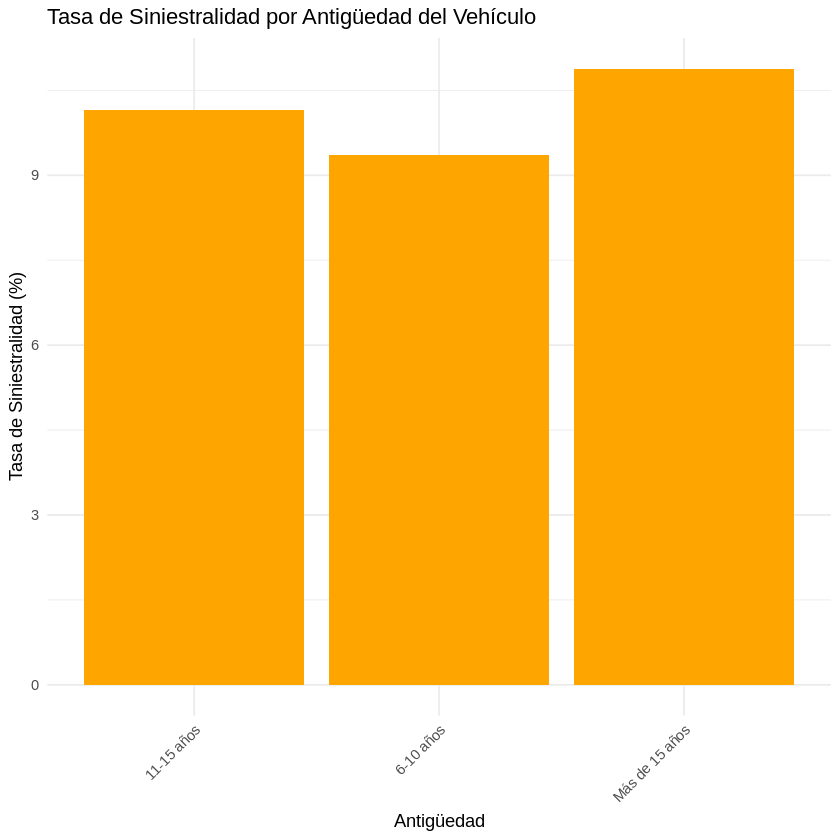

In [21]:
data_antiguedad <- data_clean %>%
  filter(!is.na(Modelo) & !is.na(Pago)) %>%
  mutate(
    antiguedad = 2023 - Modelo,
    rango_antiguedad = case_when(
      antiguedad <= 2 ~ "0-2 años",
      antiguedad <= 5 ~ "3-5 años",
      antiguedad <= 10 ~ "6-10 años",
      antiguedad <= 15 ~ "11-15 años",
      TRUE ~ "Más de 15 años"
    )
  )

antiguedad_siniestros <- data_antiguedad %>%
  group_by(rango_antiguedad) %>%
  summarise(
    total = n(),
    siniestros = sum(Pago == unique(data_clean$Pago)[2], na.rm = TRUE),
    tasa_siniestralidad = round(siniestros / total * 100, 4),
    .groups = 'drop'
  )

ggplot(antiguedad_siniestros, aes(x = rango_antiguedad, y = tasa_siniestralidad)) +
  geom_col(fill = "orange") +
  labs(title = "Tasa de Siniestralidad por Antigüedad del Vehículo",
       x = "Antigüedad", y = "Tasa de Siniestralidad (%)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

kable(antiguedad_siniestros,
      col.names = c("Antigüedad", "Total Pólizas", "Siniestros", "Tasa Siniestralidad (%)"))

## Correlaciones

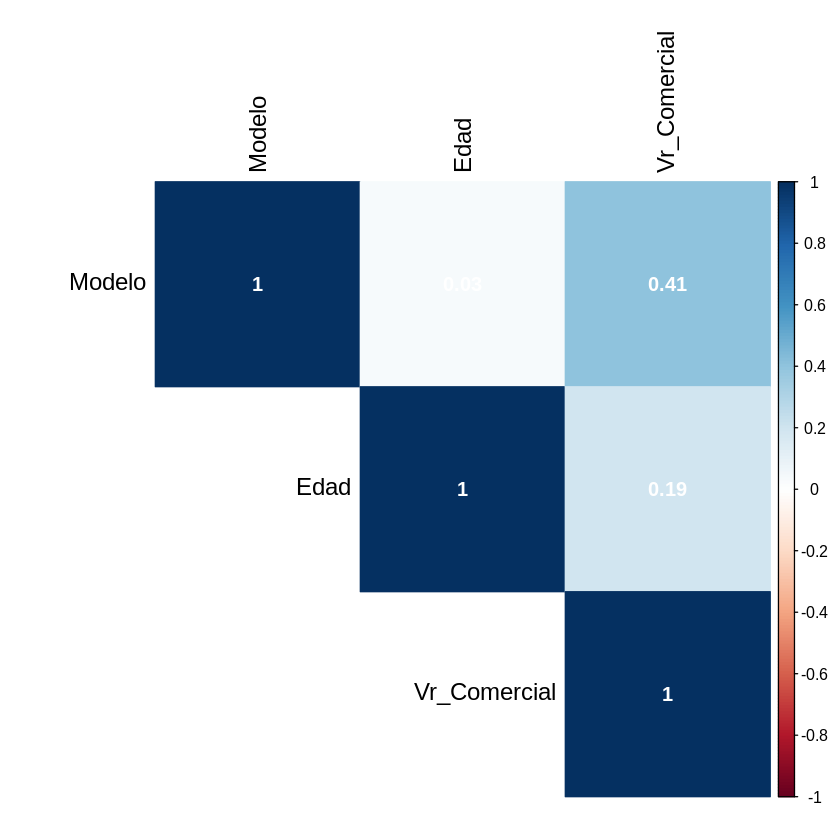

In [22]:
vars_numericas_clean <- data_clean %>%
  select(all_of(variables_numericas)) %>%
  na.omit()

if(nrow(vars_numericas_clean) > 0) {
  cor_matrix <- cor(vars_numericas_clean)
  corrplot(cor_matrix, method = "color", type = "upper", 
           addCoef.col = "white", tl.cex = 1.2, tl.col = "black")
}

## 11. Resumen Ejecutivo del Análisis

In [23]:
cat("=== RESUMEN EJECUTIVO PARA MODELACIÓN GLM ===\n\n")

cat("1. DIMENSIONES Y CALIDAD DE DATOS:\n")
cat("   - Registros totales:", nrow(data_clean), "\n")
cat("   - Variables disponibles:", ncol(data_clean), "\n")
tasa_global <- round(sum(data_clean$Pago == unique(data_clean$Pago)[2], na.rm = TRUE) / nrow(data_clean) * 100, 4)
cat("   - Tasa de siniestralidad global:", tasa_global, "%\n\n")

cat("2. VARIABLES CRÍTICAS PARA EL MODELO GLM:\n")
cat("   A. SERVICIO DEL VEHÍCULO (Factor más relevante):\n")
servicio_analysis <- data_clean %>%
  filter(!is.na(SERVICIO) & !is.na(Pago)) %>%
  group_by(SERVICIO) %>%
  summarise(tasa = round(sum(Pago == unique(data_clean$Pago)[2]) / n() * 100, 3)) %>%
  arrange(desc(tasa))
for(i in 1:nrow(servicio_analysis)) {
  cat("      -", servicio_analysis$SERVICIO[i], ":", servicio_analysis$tasa[i], "%\n")
}

cat("   B. EDAD DEL ASEGURADO (Variable demográfica clave):\n")
cat("      - Muestra curva de riesgo típica de seguros de auto\n")
cat("      - Mayor riesgo en extremos de edad\n")

cat("   C. VALOR COMERCIAL DEL VEHÍCULO:\n")
cat("      - Proxy de suma asegurada y exposición económica\n")
cat("      - Distribución concentrada en gama media-baja\n\n")

cat("3. PROBLEMAS IDENTIFICADOS EN LOS DATOS:\n")
valores_edad_cero <- sum(data_clean$Edad == 0, na.rm = TRUE)
if(valores_edad_cero > 0) {
  cat("   - CRÍTICO:", valores_edad_cero, "registros con Edad = 0 - REQUIERE LIMPIEZA\n")
}

missing_criticos <- sapply(c("SERVICIO", "Sexo_Aseg", "TIPO_VEHICULO"), function(var) {
  sum(is.na(data_clean[[var]])) / nrow(data_clean) * 100
})
for(var in names(missing_criticos)) {
  if(missing_criticos[var] > 10) {
    cat("   - Variable", var, ":", round(missing_criticos[var], 1), "% valores faltantes\n")
  }
}

cat("\n4. RECOMENDACIONES ESPECÍFICAS PARA GLM:\n")
cat("   A. SELECCIÓN DE VARIABLES:\n")
cat("      - Variables obligatorias: SERVICIO, Edad, Vr_Comercial\n")
cat("      - Variables complementarias: TIPO_VEHICULO, Sexo_Aseg, MARCA (agrupada)\n")
cat("      - Evaluar interacciones: Edad × SERVICIO\n\n")

cat("   B. TRATAMIENTO DE VARIABLES:\n")
cat("      - Edad: Limpiar valores 0, considerar transformación cuadrática\n")
cat("      - MARCA: Agrupar categorías con <1% de frecuencia\n")
cat("      - Vr_Comercial: Evaluar transformación logarítmica por alta variabilidad\n\n")

cat("   C. ESTRUCTURA DEL MODELO:\n")
cat("      - Distribución: Binomial (frecuencia de siniestros)\n")
cat("      - Link function: Logit (estándar para probabilidades)\n")
cat("      - Offset: Considerar exposición temporal si disponible\n\n")

cat("   D. VALIDACIÓN Y SEGMENTACIÓN:\n")
cat("      - Validar supuestos de GLM (independencia, linealidad en escala link)\n")
cat("      - Análisis de residuos por segmentos\n")
cat("      - Pruebas de significancia estadística por variable\n")
cat("      - Evaluación de capacidad predictiva (AUC, lift curves)\n\n")

cat("5. PRÓXIMOS PASOS RECOMENDADOS:\n")
cat("   1. Limpieza de datos (edades 0, valores faltantes)\n")
cat("   2. Ingeniería de características (agrupaciones, transformaciones)\n")
cat("   3. División train/test estratificada por SERVICIO\n")
cat("   4. Ajuste del modelo GLM con validación cruzada\n")
cat("   5. Interpretación actuarial de coeficientes\n")
cat("   6. Construcción de tabla de factores para pricing\n")

=== RESUMEN EJECUTIVO PARA MODELACIÓN GLM ===

1. DIMENSIONES Y CALIDAD DE DATOS:
   - Registros totales: 5000 
   - Variables disponibles: 18 
   - Tasa de siniestralidad global: 10.3 %

2. VARIABLES CRÍTICAS PARA EL MODELO GLM:
   A. SERVICIO DEL VEHÍCULO (Factor más relevante):
      - Transporte Personal : 14.286 %
      - Oficial : 12.121 %
      - Particular : 10.44 %
      - Publico : 9.177 %
   B. EDAD DEL ASEGURADO (Variable demográfica clave):
      - Muestra curva de riesgo típica de seguros de auto
      - Mayor riesgo en extremos de edad
   C. VALOR COMERCIAL DEL VEHÍCULO:
      - Proxy de suma asegurada y exposición económica
      - Distribución concentrada en gama media-baja

3. PROBLEMAS IDENTIFICADOS EN LOS DATOS:
   - CRÍTICO: 795 registros con Edad = 0 - REQUIERE LIMPIEZA
   - Variable Sexo_Aseg : 12.5 % valores faltantes

4. RECOMENDACIONES ESPECÍFICAS PARA GLM:
   A. SELECCIÓN DE VARIABLES:
      - Variables obligatorias: SERVICIO, Edad, Vr_Comercial
      - Varia

### 12.1 Análisis de Interacciones Potenciales

In [24]:
interaccion_edad_servicio <- data_clean %>%
  filter(!is.na(Edad) & Edad > 0 & !is.na(SERVICIO) & !is.na(Pago)) %>%
  mutate(
    rango_edad = case_when(
      Edad <= 30 ~ "18-30",
      Edad <= 50 ~ "31-50", 
      TRUE ~ "51+"
    )
  ) %>%
  group_by(SERVICIO, rango_edad) %>%
  summarise(
    total = n(),
    siniestros = sum(Pago == unique(data_clean$Pago)[2], na.rm = TRUE),
    tasa_siniestralidad = round(siniestros / total * 100, 4),
    .groups = 'drop'
  ) %>%
  filter(total >= 10)

plot_interaccion <- ggplot(interaccion_edad_servicio, aes(x = rango_edad, y = tasa_siniestralidad, fill = SERVICIO)) +
  geom_col(position = "dodge", alpha = 0.7) +
  geom_text(aes(label = paste0(round(tasa_siniestralidad, 2), "%")), 
            position = position_dodge(width = 0.9), vjust = -0.5, size = 4) +
  labs(title = "Interacción: Edad del Asegurado × Servicio del Vehículo",
       subtitle = "Análisis de tasas de siniestralidad cruzadas",
       x = "Rango de Edad", y = "Tasa de Siniestralidad (%)", fill = "Servicio") +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    plot.subtitle = element_text(size = 14),
    axis.title = element_text(size = 14, face = "bold"),
    axis.text = element_text(size = 12),
    legend.title = element_text(size = 12, face = "bold"),
    legend.text = element_text(size = 11)
  )

save_plot(plot_interaccion, "interaccion_edad_servicio.png", width = 12, height = 8)

kable(interaccion_edad_servicio,
      col.names = c("Servicio", "Rango Edad", "Total", "Siniestros", "Tasa (%)"))

cat("INTERPRETACIÓN DE INTERACCIONES:\n")
cat("- La combinación de edad y tipo de servicio muestra patrones diferenciados\n")
cat("- Importante considerar términos de interacción en el modelo GLM\n\n")
cat("Gráfica exportada: interaccion_edad_servicio.png")



|Servicio   |Rango Edad | Total| Siniestros| Tasa (%)|
|:----------|:----------|-----:|----------:|--------:|
|Oficial    |51+        |   224|         29|  12.9464|
|Particular |18-30      |   262|         34|  12.9771|
|Particular |31-50      |  1823|        186|  10.2030|
|Particular |51+        |  1055|        116|  10.9953|
|Publico    |18-30      |    86|          8|   9.3023|
|Publico    |31-50      |   362|         28|   7.7348|
|Publico    |51+        |   379|         39|  10.2902|

INTERPRETACIÓN DE INTERACCIONES:
- La combinación de edad y tipo de servicio muestra patrones diferenciados
- Importante considerar términos de interacción en el modelo GLM

Gráfica exportada: interaccion_edad_servicio.png

### 12.2 Análisis de Marcas Principales



|Marca   | Total Pólizas| Siniestros| Tasa (%)| Valor Promedio|
|:-------|-------------:|----------:|--------:|--------------:|
|HYUNDAI |          5000|        515|     10.3|       26448817|


RECOMENDACIONES PARA AGRUPACIÓN DE MARCAS EN GLM:
- Marcas con <100 pólizas: 0 - Considerar categoría 'Otras'
- Evaluar agrupación por segmento (Premium, Masivo, Comercial)

Gráfica exportada: analisis_marcas_principales.png

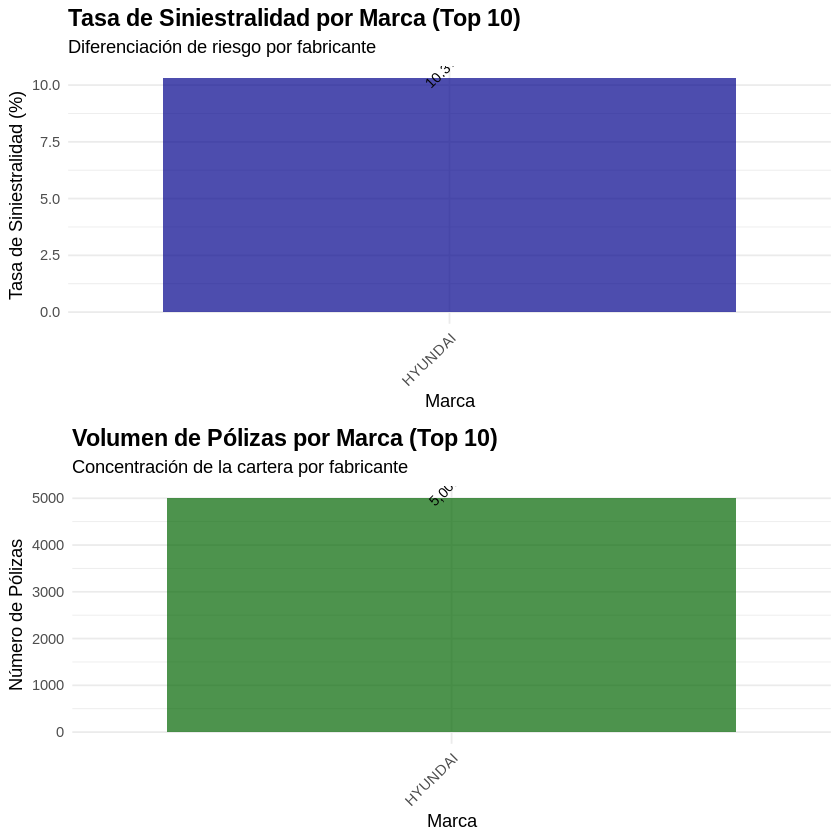

In [25]:
marcas_top <- data_clean %>%
  filter(!is.na(MARCA) & !is.na(Pago)) %>%
  count(MARCA, sort = TRUE) %>%
  head(10) %>%
  pull(MARCA)

analisis_marcas <- data_clean %>%
  filter(MARCA %in% marcas_top & !is.na(Pago)) %>%
  group_by(MARCA) %>%
  summarise(
    total_polizas = n(),
    siniestros = sum(Pago == unique(data_clean$Pago)[2], na.rm = TRUE),
    tasa_siniestralidad = round(siniestros / total_polizas * 100, 4),
    valor_promedio = round(mean(Vr_Comercial, na.rm = TRUE), 0),
    .groups = 'drop'
  ) %>%
  arrange(desc(total_polizas))

plot_marcas_tasa <- ggplot(analisis_marcas, aes(x = reorder(MARCA, -tasa_siniestralidad), y = tasa_siniestralidad)) +
  geom_col(fill = "darkblue", alpha = 0.7) +
  geom_text(aes(label = paste0(round(tasa_siniestralidad, 3), "%")), 
            angle = 45, vjust = -0.5, size = 3) +
  labs(title = "Tasa de Siniestralidad por Marca (Top 10)",
       subtitle = "Diferenciación de riesgo por fabricante",
       x = "Marca", y = "Tasa de Siniestralidad (%)") +
  theme_minimal() +
  theme(plot.title = element_text(size = 14, face = "bold"),
        axis.text.x = element_text(angle = 45, hjust = 1))

plot_marcas_vol <- ggplot(analisis_marcas, aes(x = reorder(MARCA, -total_polizas), y = total_polizas)) +
  geom_col(fill = "darkgreen", alpha = 0.7) +
  geom_text(aes(label = scales::comma(total_polizas)), 
            angle = 45, vjust = -0.5, size = 3) +
  labs(title = "Volumen de Pólizas por Marca (Top 10)",
       subtitle = "Concentración de la cartera por fabricante",
       x = "Marca", y = "Número de Pólizas") +
  theme_minimal() +
  theme(plot.title = element_text(size = 14, face = "bold"),
        axis.text.x = element_text(angle = 45, hjust = 1))

combined_marcas <- grid.arrange(plot_marcas_tasa, plot_marcas_vol, ncol = 1)

save_plot(combined_marcas, "analisis_marcas_principales.png", width = 12, height = 10)

kable(analisis_marcas,
      col.names = c("Marca", "Total Pólizas", "Siniestros", "Tasa (%)", "Valor Promedio"))

cat("\nRECOMENDACIONES PARA AGRUPACIÓN DE MARCAS EN GLM:\n")
marcas_baja_freq <- sum(analisis_marcas$total_polizas < 100)
cat("- Marcas con <100 pólizas:", marcas_baja_freq, "- Considerar categoría 'Otras'\n")
cat("- Evaluar agrupación por segmento (Premium, Masivo, Comercial)\n\n")
cat("Gráfica exportada: analisis_marcas_principales.png")

### 12.3 Análisis de Severidad por Amparo



|Amparo | Num. Siniestros| Valor Promedio| Valor Mediano| Valor Total| Desv. Estándar|
|:------|---------------:|--------------:|-------------:|-----------:|--------------:|
|GT     |              20|       15415108|      18015625|   308302152|        8834065|
|PTD    |              21|       14980908|      11854989|   314599059|       10238124|
|PTH    |              25|       12863563|      14903500|   321589085|        7508244|
|PPD    |             389|        3447943|       2749222|  1341249791|        2952103|
|RC     |              51|        3333659|       1508000|   170016617|        5737481|
|PPH    |               8|         867484|        950424|     6939869|         332987|
|ASI    |               1|         755600|        755600|      755600|             NA|


ANÁLISIS ACTUARIAL DE SEVERIDAD POR AMPARO:
- Severidad promedio global: 7,380,609 COP
- Amparo más costoso: GT con 15,415,108 COP promedio
- Amparo más frecuente: PPD con 389 siniestros

IMPORTANCIA PARA PRICING:
- La severidad varía significativamente entre tipos de amparo
- Importante considerar el tipo de cobertura en modelos de severidad
- PPD (Pérdida Parcial por Daños) típicamente el más frecuente

Gráfica exportada: analisis_severidad_amparos.png

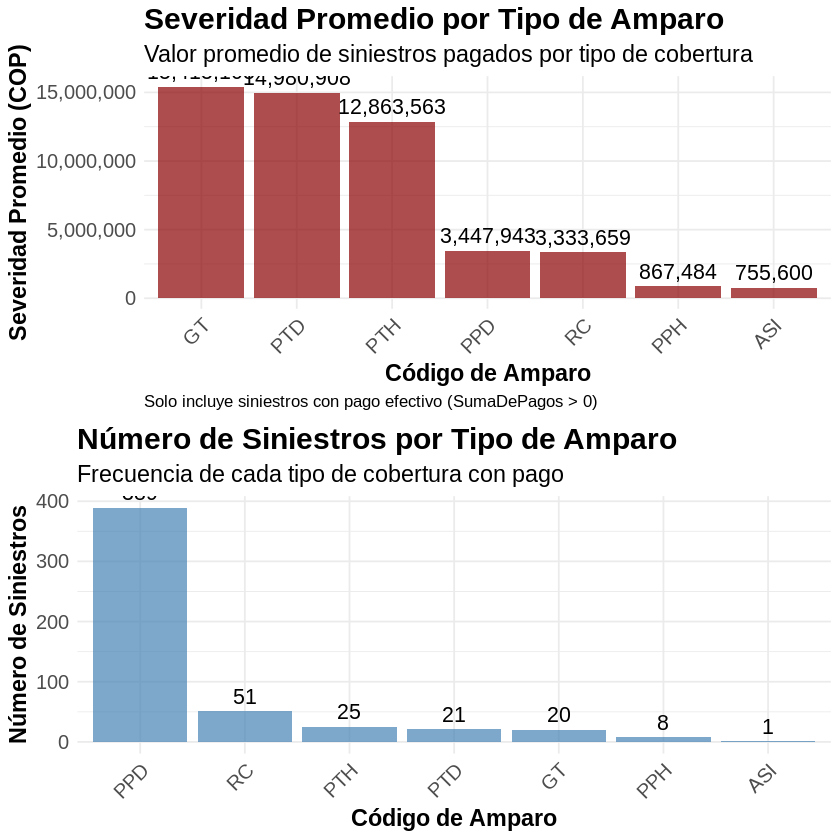

In [26]:
analisis_amp_severidad <- data_clean %>%
  filter(!is.na(Amp) & !is.na(SumaDePagos) & SumaDePagos > 0) %>%
  mutate(SumaDePagos = as.numeric(SumaDePagos)) %>%
  group_by(Amp) %>%
  summarise(
    num_siniestros = n(),
    valor_promedio = round(mean(SumaDePagos, na.rm = TRUE), 0),
    valor_mediano = round(median(SumaDePagos, na.rm = TRUE), 0),
    valor_total = round(sum(SumaDePagos, na.rm = TRUE), 0),
    desv_estandar = round(sd(SumaDePagos, na.rm = TRUE), 0),
    .groups = 'drop'
  ) %>%
  arrange(desc(valor_promedio))

plot_severidad_amp <- ggplot(analisis_amp_severidad, aes(x = reorder(Amp, -valor_promedio), y = valor_promedio)) +
  geom_col(fill = "darkred", alpha = 0.7) +
  geom_text(aes(label = scales::comma(valor_promedio)), 
            vjust = -0.5, size = 4.5, angle = 0) +
  labs(title = "Severidad Promedio por Tipo de Amparo",
       subtitle = "Valor promedio de siniestros pagados por tipo de cobertura",
       x = "Código de Amparo", y = "Severidad Promedio (COP)",
       caption = "Solo incluye siniestros con pago efectivo (SumaDePagos > 0)") +
  scale_y_continuous(labels = scales::comma) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    plot.subtitle = element_text(size = 14),
    axis.title = element_text(size = 14, face = "bold"),
    axis.text = element_text(size = 12),
    axis.text.x = element_text(angle = 45, hjust = 1),
    plot.caption = element_text(size = 10, hjust = 0)
  )

plot_volumen_amp <- ggplot(analisis_amp_severidad, aes(x = reorder(Amp, -num_siniestros), y = num_siniestros)) +
  geom_col(fill = "steelblue", alpha = 0.7) +
  geom_text(aes(label = num_siniestros), 
            vjust = -0.5, size = 4.5) +
  labs(title = "Número de Siniestros por Tipo de Amparo",
       subtitle = "Frecuencia de cada tipo de cobertura con pago",
       x = "Código de Amparo", y = "Número de Siniestros") +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    plot.subtitle = element_text(size = 14),
    axis.title = element_text(size = 14, face = "bold"),
    axis.text = element_text(size = 12),
    axis.text.x = element_text(angle = 45, hjust = 1)
  )

combined_amp <- grid.arrange(plot_severidad_amp, plot_volumen_amp, ncol = 1)

save_plot(combined_amp, "analisis_severidad_amparos.png", width = 12, height = 10)

kable(analisis_amp_severidad,
      col.names = c("Amparo", "Num. Siniestros", "Valor Promedio", "Valor Mediano", 
                    "Valor Total", "Desv. Estándar"))

cat("\nANÁLISIS ACTUARIAL DE SEVERIDAD POR AMPARO:\n")
severidad_global <- round(mean(analisis_amp_severidad$valor_promedio), 0)
cat("- Severidad promedio global:", scales::comma(severidad_global), "COP\n")

amparo_mas_costoso <- analisis_amp_severidad$Amp[1]
costo_mas_alto <- analisis_amp_severidad$valor_promedio[1]
cat("- Amparo más costoso:", amparo_mas_costoso, "con", scales::comma(costo_mas_alto), "COP promedio\n")

amparo_mas_frecuente <- analisis_amp_severidad$Amp[which.max(analisis_amp_severidad$num_siniestros)]
freq_mas_alta <- max(analisis_amp_severidad$num_siniestros)
cat("- Amparo más frecuente:", amparo_mas_frecuente, "con", freq_mas_alta, "siniestros\n")

cat("\nIMPORTANCIA PARA PRICING:\n")
cat("- La severidad varía significativamente entre tipos de amparo\n")
cat("- Importante considerar el tipo de cobertura en modelos de severidad\n")
cat("- PPD (Pérdida Parcial por Daños) típicamente el más frecuente\n\n")

cat("Gráfica exportada: analisis_severidad_amparos.png")

=== ESTADÍSTICAS BÁSICAS ===
Número de siniestros con pago: 485 
Correlación Valor vs Suma Pagos: -0.0947 



`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


📊 Gráfica exportada: pairplot_valor_pagos.png

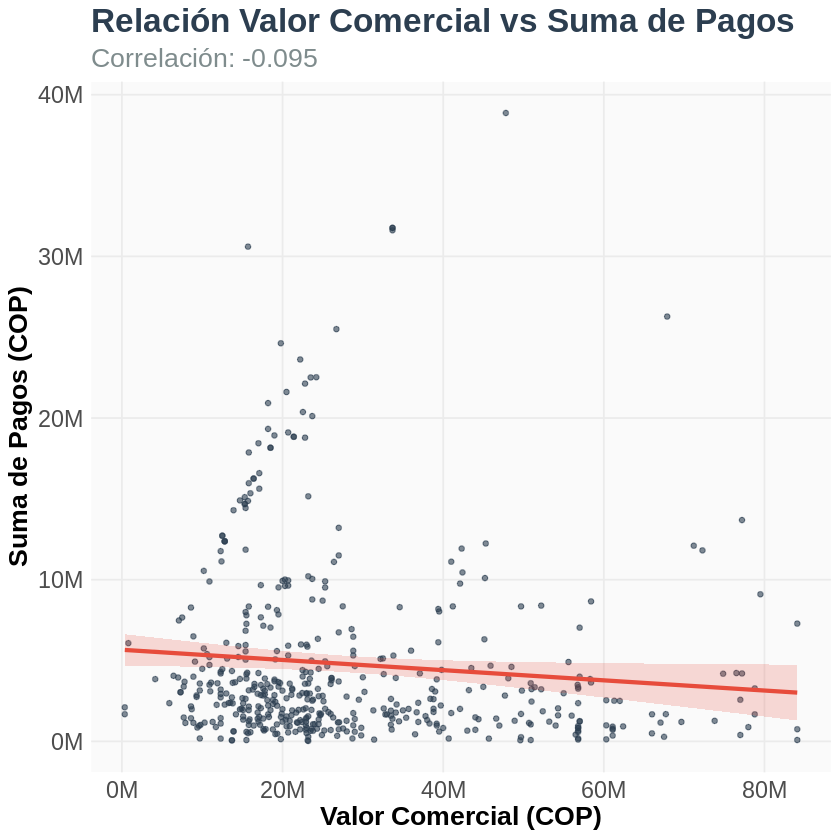

In [27]:
# Análisis simplificado: Solo pairplot con regresión lineal
# Preparar datos solo con siniestros que tuvieron pago
datos_pago <- data_clean %>%
  filter(!is.na(SumaDePagos) & !is.na(Vr_Comercial) & 
         SumaDePagos > 0 & Vr_Comercial > 0) %>%
  mutate(SumaDePagos = as.numeric(SumaDePagos))

cat("=== ESTADÍSTICAS BÁSICAS ===\n")
cat("Número de siniestros con pago:", nrow(datos_pago), "\n")
cat("Correlación Valor vs Suma Pagos:", round(cor(datos_pago$Vr_Comercial, datos_pago$SumaDePagos), 4), "\n\n")

# GRÁFICO ÚNICO: Scatter plot con tendencia de regresión lineal
plot_valor_pagos <- ggplot(datos_pago, aes(x = Vr_Comercial, y = SumaDePagos)) +
  geom_point(alpha = 0.6, color = "#2C3E50", size = 1.2) +
  geom_smooth(method = "lm", color = "#E74C3C", fill = "#E74C3C", alpha = 0.2, linewidth = 1.2) +
  scale_x_continuous(labels = function(x) paste0(x/1e6, "M"), name = "Valor Comercial (COP)") +
  scale_y_continuous(labels = function(x) paste0(x/1e6, "M"), name = "Suma de Pagos (COP)") +
  labs(title = "Relación Valor Comercial vs Suma de Pagos",
       subtitle = paste0("Correlación: ", round(cor(datos_pago$Vr_Comercial, datos_pago$SumaDePagos), 3))) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 20, face = "bold", color = "#2C3E50"),
    plot.subtitle = element_text(size = 16, color = "#7F8C8D"),
    axis.title = element_text(size = 16, face = "bold"),
    axis.text = element_text(size = 14),
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "#FAFAFA", color = NA)
  )

# Mostrar y guardar el gráfico
print(plot_valor_pagos)

# Guardar con alta resolución
save_plot(plot_valor_pagos, "pairplot_valor_pagos.png", width = 10, height = 8)

cat("📊 Gráfica exportada: pairplot_valor_pagos.png")

### 12.4 Análisis Multidimensional: Valor Comercial vs Suma de Pagos

Análisis exhaustivo de la relación entre el valor comercial del vehículo y los montos de siniestros pagados, fundamental para entender la exposición económica y calibrar modelos de severidad.